In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import random
import openweathermapy as ow
import numpy as np
from citipy import citipy 
import requests as req
import time

In [2]:
Lat = ([(np.random.uniform(-90, 90)) for x in range (1500)])
Lon = ([(np.random.uniform(-180, 180)) for x in range (1500)]) 

In [3]:
random_df = pd.DataFrame({"Latitude": Lat, "Longitude": Lon})
random_df.head()

,Latitude,Longitude
0,-40.347427,172.219850
1,-58.033454,-1.067768
2,35.898742,171.353011
3,-57.204429,95.089842
4,7.915040,-35.779870


In [4]:
random_df["City"] = ""
random_df["Country"] = ""

for index, row in random_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    random_df.set_value(index, "City", city.city_name )
    random_df.set_value(index, "Country", city.country_code)
    
random_df.drop_duplicates(["City"], keep="first")

,Latitude,Longitude,City,Country
0,-40.347427,172.219850,takaka,nz
1,-58.033454,-1.067768,cape town,za
2,35.898742,171.353011,nikolskoye,ru
3,-57.204429,95.089842,busselton,au
4,7.915040,-35.779870,itarema,br
5,-70.878379,126.910885,new norfolk,au
6,-85.162082,-159.478817,mataura,pf
7,-87.172806,145.350331,hobart,au
8,43.796535,96.205972,hami,cn
9,6.730047,97.349492,phuket,th


In [11]:
api_key = "4b1e2f1ed04375961cf740e7467d20cc"
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "Imperial"


random_df["Temp"] = ""
random_df["Humid"] = ""
random_df["Cloud"] = ""
random_df["Wind"] = ""

wait_count = 0

for index, row in random_df.iterrows(): 
    try: 
        query = url + row["City"].replace(" ","+") + "," + row["Country"] + "&appid=" + api_key + "&units=Imperial"
        print(query)
        get = req.get(query)
        wait_count = wait_count + 1
        getJ = get.json()
        random_df.set_value(index, "temp", getJ["main"]["temp"])
        random_df.set_value(index, "Humid", getJ["main"]["humidity"])
        random_df.set_value(index, "Cloud", getJ["clouds"]["all"])
        random_df.set_value(index, "Wind", getJ["wind"]["speed"])
        
        
    except: 
        random_df.set_value(index, "Temp", "FAIL")
        
    if wait_count == 40:
        print("sleeping for 10 seconds ...")
        time.sleep(10)
        print("")
        wait_count = 0 


        

http://api.openweathermap.org/data/2.5/weather?q=takaka,nz&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=cape+town,za&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=itarema,br&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=new+norfolk,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=hobart,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=hami,cn&appid=4b1e2f1ed0437596

http://api.openweathermap.org/data/2.5/weather?q=wau,pg&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=casino,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=keita,ne&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=punta+arenas,cl&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=tilichiki,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&appid=4b1e2f1ed04375961cf74

http://api.openweathermap.org/data/2.5/weather?q=hobart,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=punta+arenas,cl&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=swellendam,za&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=mount+isa,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=umzimvubu,za&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=manggar,id&appid=4b1e2f1ed043

http://api.openweathermap.org/data/2.5/weather?q=faya,td&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=cherskiy,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=puerto+ayora,ec&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=buchanan,lr&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=sao+filipe,cv&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&appid=4b1e2f1e

http://api.openweathermap.org/data/2.5/weather?q=svetlaya,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=novopokrovskaya,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=saleaula,ws&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=viedma,ar&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=san+patricio,mx&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=vaitupu,wf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=san+policarpo,ph&appid=4

http://api.openweathermap.org/data/2.5/weather?q=mayo,ca&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
sleeping for 10 seconds ...

http://api.openweathermap.org/data/2.5/weather?q=arraial+do+cabo,br&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=saint+george,bm&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=beloha,mg&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=san+cristobal,ec&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?q=airai,pw&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=sistranda,no&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=broome,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=sibolga,id&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=sentyabrskiy,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
sleeping for 10 seconds ...

http://api.openweathermap.org/data/2.5/weather?q=saint+george,bm&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=bathsheba,bb&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weathe

http://api.openweathermap.org/data/2.5/weather?q=san+patricio,mx&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=pevek,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=tsihombe,mg&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=sao+filipe,cv&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=norman+wells,ca&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=castro,cl&appid=4b1e2f1

http://api.openweathermap.org/data/2.5/weather?q=inongo,cd&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=mount+gambier,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=tazovskiy,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=maniitsoq,gl&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=mar+del+plata,ar&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=new+norfolk,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=karauzyak,uz&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=saint+george,bm&appi

http://api.openweathermap.org/data/2.5/weather?q=saint+george,bm&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=ongandjera,na&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=belaya+gora,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=pisco,pe&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=poum,nc&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=samusu,ws&appid=4b1e2f1

http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=albany,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&appid=4b1e2f1ed

http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=roald,no&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=kakamigahara,jp&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=fort+nelson,ca&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=the+pas,ca&appid=4b1e2f1ed0437

http://api.openweathermap.org/data/2.5/weather?q=busselton,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
sleeping for 10 seconds ...

http://api.openweathermap.org/data/2.5/weather?q=neustadt,de&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=remontnoye,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weathe

http://api.openweathermap.org/data/2.5/weather?q=ushtobe,kz&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=barentsburg,sj&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=emerald,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=makaha,us&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=vaini,to&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
sleeping for 10 seconds ...

http://api.openweathermap.org/data/2.5/weather?q=lompoc,us&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,

http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=hobart,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=mayor+pablo+lagerenza,py&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=namibe,ao&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=souillac,mu&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&appid=4b1e2f

http://api.openweathermap.org/data/2.5/weather?q=tromso,no&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=pathankot,in&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=constitucion,mx&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=mar+del+plata,ar&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=namatanai,pg&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=mocuba,mz&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=nhulunbuy,au&appid=4b1e2f

http://api.openweathermap.org/data/2.5/weather?q=new+norfolk,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=tilichiki,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=plettenberg+bay,za&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=hasaki,jp&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=puerto+escondido,mx&appid

http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=palabuhanratu,id&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=shubarkuduk,kz&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=vaitupu,wf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=havre-saint-pierre,ca&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=rafai,cf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=bilma,ne&appi

http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=new+norfolk,au&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=marcona,pe&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=vaini,to&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=morant+bay,jm&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
sleeping for 10 seconds ...

http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=maraa,br&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=ushuai

http://api.openweathermap.org/data/2.5/weather?q=talnakh,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=manga,bf&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=port+elizabeth,za&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=gbarnga,lr&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=mys+shmidta,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=lompoc,us&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=hambantota,lk&appid=4b

http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=tilichiki,ru&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=seoul,kr&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=mar+del+plata,ar&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=tual,id&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=port+alfred,za&appid=4b1e2f1ed04375961cf740e7467d20cc&units=Imperial
http://api.openweathermap.org/data/2.5/weather?q=vila+velha,br&appid=4b1e2f1ed043

In [31]:
clean_df = random_df.drop_duplicates(["City"], keep="last")
clean_df["City"].value_counts()
clean_df.head()

,Latitude,Longitude,City,Country,Temp,Humid,Cloud,Wind,temp
0,-40.347427,172.219850,takaka,nz,,88,0,6.4,69.10
8,43.796535,96.205972,hami,cn,,55,8,3.11,2.05
9,6.730047,97.349492,phuket,th,,88,75,7.29,75.20
14,24.615595,-108.204756,la reforma,mx,,41,5,5.82,78.80
15,-26.335763,28.725825,delmas,za,,54,20,3.83,61.90


In [32]:
weather_df = clean_df.dropna(how='any')


In [33]:
temp_df = weather_df[["Latitude", "temp"]]
humid_df = weather_df[["Latitude", "Humid"]]
cloud_df = weather_df[["Latitude", "Cloud"]]
wind_df = weather_df[["Latitude", "Wind"]] 

ValueError: could not convert string to float: 

ValueError: could not convert string to float: 

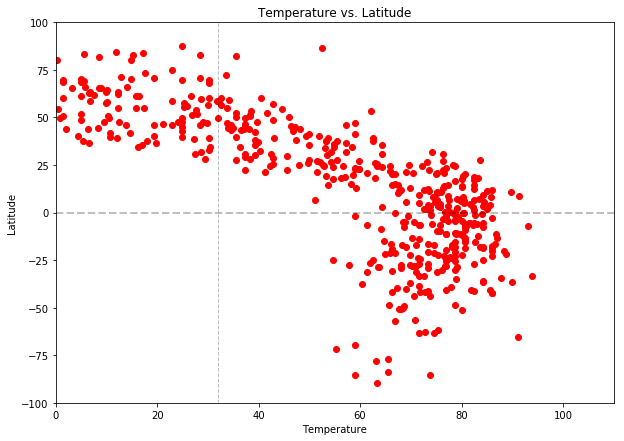

In [34]:
plt.figure(figsize=(10,7))
plt.scatter(temp_df["temp"], temp_df["Latitude"], color = "red")
plt.title("Temperature vs. Latitude")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.ylim(-100,100)
plt.xlim(0,110)
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.axvline(x=32, linestyle = "--", linewidth = 1, color = "black", alpha = .25)
plt.show()


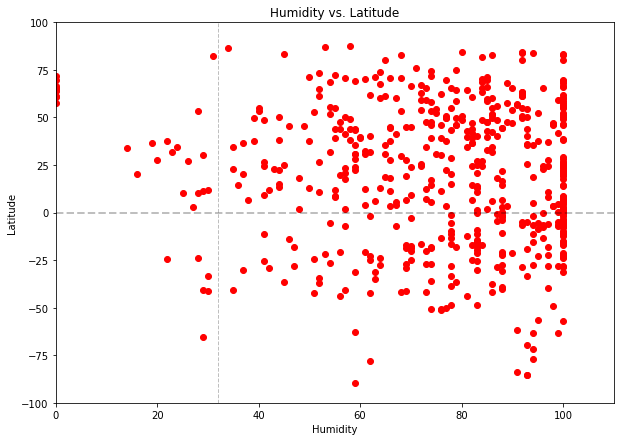

In [35]:
plt.figure(figsize=(10,7))
plt.scatter(humid_df["Humid"], humid_df["Latitude"], color = "red")
plt.title("Humidity vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(-100,100)
plt.xlim(0,110)
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.axvline(x=32, linestyle = "--", linewidth = 1, color = "black", alpha = .25)
plt.show()


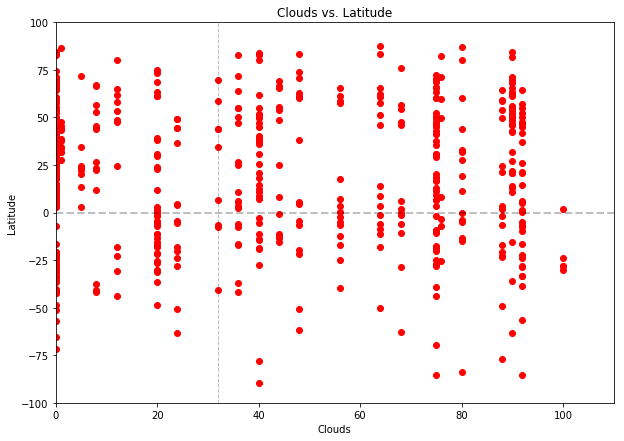

In [36]:
plt.figure(figsize=(10,7))
plt.scatter(cloud_df["Cloud"], cloud_df["Latitude"], color = "red")
plt.title("Clouds vs. Latitude")
plt.xlabel("Clouds")
plt.ylabel("Latitude")
plt.ylim(-100,100)
plt.xlim(0,110)
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.axvline(x=32, linestyle = "--", linewidth = 1, color = "black", alpha = .25)
plt.show()


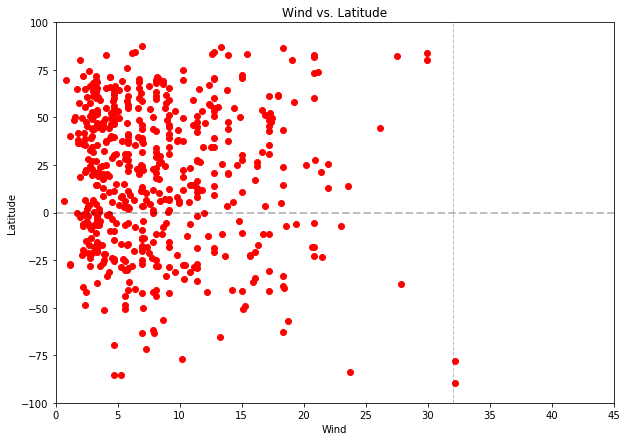

In [39]:
plt.figure(figsize=(10,7))
plt.scatter(wind_df["Wind"], cloud_df["Latitude"], color = "red")
plt.title("Wind vs. Latitude")
plt.xlabel("Wind")
plt.ylabel("Latitude")
plt.ylim(-100,100)
plt.xlim(0,45)
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.axvline(x=32, linestyle = "--", linewidth = 1, color = "black", alpha = .25)
plt.show()